In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [3]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

class_names = ['0','1','2','3','4','5','6','7','8','9']
NUM_CLASSES = 10

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
from tensorflow.keras.utils import to_categorical

x_train = x_train / 255
x_test = x_test / 255

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)
print("converted y.shape = ", y_train.shape)

converted y.shape =  (60000, 10)


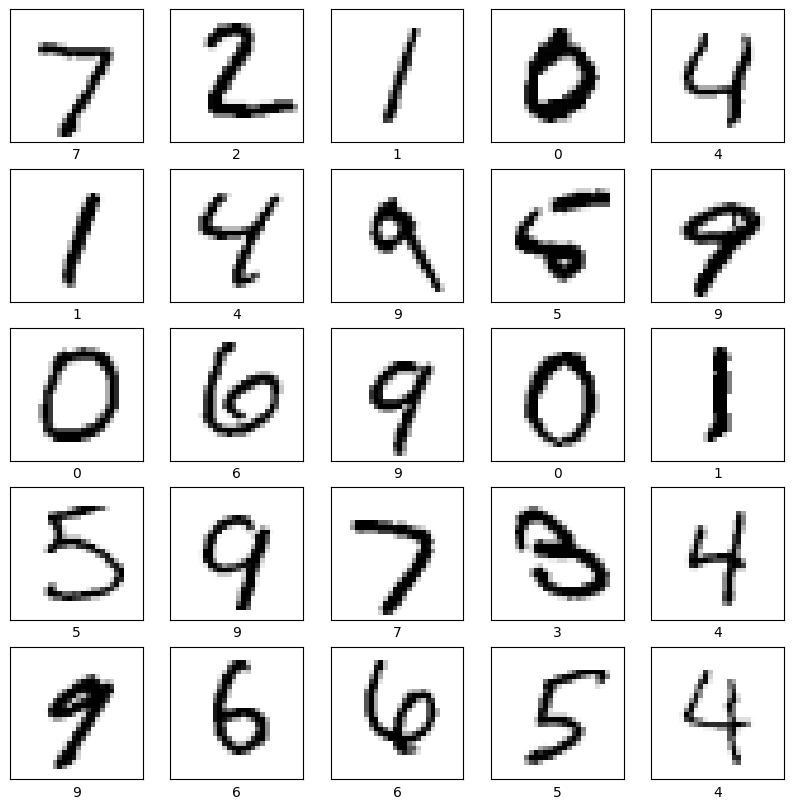

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i].argmax()])

In [10]:
from tensorflow.keras.layers import Input, Flatten, Dense, Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

input_layer = Input((28,28))
x = Flatten()(input_layer)
x = Dense(128, activation = 'relu')(x)
output_layer = Dense(NUM_CLASSES, activation = 'softmax')(x)
model = Model(input_layer, output_layer)

In [ ]:
# from tensorflow.keras.layers import Flatten, Dense

# model = keras.Sequential([
#     Fatten(input_shape = (28,28)),
#     Dense(128, activation = 'relu'),
#     Dense(10, activation = 'softmax')
# ])

In [11]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd',
             loss='mse',
             metrics=['accuracy'])
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0883 - accuracy: 0.2027
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0771 - accuracy: 0.5182
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0624 - accuracy: 0.6448
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0492 - accuracy: 0.7458
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0398 - accuracy: 0.8009
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0337 - accuracy: 0.8275
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0296 - accuracy: 0.8448
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0269 - accuracy: 0.8560
Epoch 9/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0249 - accuracy: 0.8637
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.023

In [13]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.8813


In [21]:
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


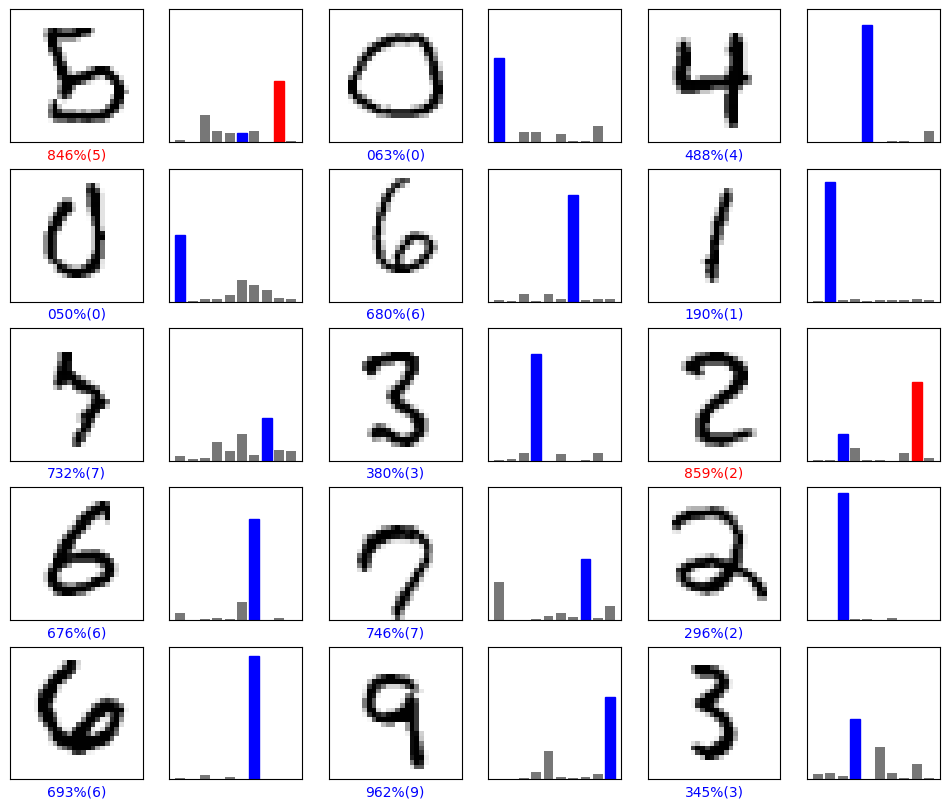

In [37]:
def plot_image(i,predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{}{:2.0f}%({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                       color = color)
  
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array, color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')
    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i+720, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i+720, predictions, test_labels)
    
plt.show()       